In [74]:
#Import Libraries
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plot
import math
import random
import networkx as nx

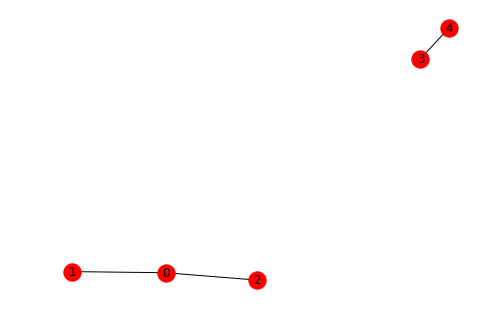

In [75]:
#1
G =nx.Graph()
AS = [[0, 1, 1, 0, 0],[1, 0, 0, 0, 0],[1,0,0,0,0],[0,0,0,0,1],[0,0,0,1,0]]
G = nx.from_numpy_matrix(np.array(AS))
nx.draw(G, with_labels = True)

In [76]:
#Adjacency Matrix W, it defines the undirected graph 
W = [[0,1,1,0,0],
     [1,0,0,0,0],
     [1,0,0,0,0],
     [0,0,0,0,1],
     [0,0,0,1,0]]
print(W)

[[0, 1, 1, 0, 0], [1, 0, 0, 0, 0], [1, 0, 0, 0, 0], [0, 0, 0, 0, 1], [0, 0, 0, 1, 0]]


In [77]:
#3) Degree Matrix D, it defines the total weight of edges incident to each vertex in W
def mD(W):
    (m,n)=np.shape(W)
    z=np.zeros((m,m))
    for i in range(m):
        for j in range(m):
            if W[i][j] != 0:
                z[i][i]+=W[i][j]
    return z
D = mD(W)
print(D)

[[2. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]


In [78]:
#3) Laplacian Matrix L
L=D-W
print(L)

[[ 2. -1. -1.  0.  0.]
 [-1.  1.  0.  0.  0.]
 [-1.  0.  1.  0.  0.]
 [ 0.  0.  0.  1. -1.]
 [ 0.  0.  0. -1.  1.]]


 4. 
The graph Laplacian is the matrix $L = D – A$ where $ D $ is the diagonal matrix whose entries are the degrees of each node and A is the adjacency matrix. The smallest eigenvalue of $ L, λ_{1}, $is always 0. 

Actually the row sums in matrix L are all equal to zero. This is true of the Laplacian matrix of any graph, and it follows from the fact that in each row we have the degree of the corresponding vertex on the diagonal, along with a (−1) for each of its incident edges. If we let x be a constant vector, then this form is zero. 

To see why the smallest eigenvalue is always 0, note that v = (1, 1, 1, …, 1) is an eigenvector for 0. Multiplying the ith row of D by v picks out the degree of node i. Multiplying the ith row of A by v sums that row, which is also the degree of node i.


So 
$A  * \begin{pmatrix}
  1  \\
  1 \\
  \vdots     \\
  1 & 
 \end{pmatrix} = \begin{pmatrix}
  d  \\
  d \\
  \vdots     \\
  d & 
 \end{pmatrix}$
and we observe that

$(D-A ) * \begin{pmatrix}
  1  \\
  1 \\
  \vdots     \\
  1 & 
 \end{pmatrix} = \begin{pmatrix}
  d-d  \\
  d-d \\
  \vdots     \\
  d-d & 
 \end{pmatrix}= \begin{pmatrix}
  0  \\
  0 \\
  \vdots     \\
  0 & 
 \end{pmatrix}= 0\begin{pmatrix}
  0  \\
  0 \\
  \vdots     \\
   & 
 \end{pmatrix}$
 

In [79]:
#5) Eigenvalues and Eigenvectors of L
eigval,eigvec=np.linalg.eig(L)
np.set_printoptions(suppress=True)
print(eigval)

[ 3. -0.  1.  2.  0.]


[-0.  0.  1.  2.  3.]


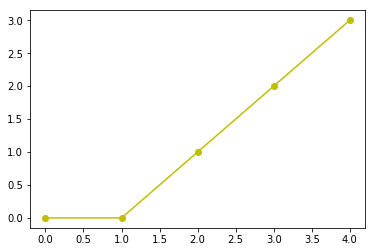

In [80]:
#6) Sort Eigenvalues and Eigenvectors in increasing order and plot Eigenvalues
eigval_sort=np.sort(eigval)
r=sorted(zip(eigval, eigvec))
print(eigval_sort)
plot.plot(eigval_sort,'yo-') 

# From the graph we see that y values correspond to the eigenvalues. We have 2 zero eigenvalues.

7
Show theoretically that the characteristic vectors of each connected component form a basis
of the eigenspace associated to the eigenvalue .
We got $2$ eigenvalues which are equal to zero. And correspodning eigenvectors are

In [81]:
print(r[0][1], r[1][1])



[-0.41 -0.58 -0.71  0.    0.  ] [ 0.    0.    0.   -0.71  0.71]


We need to show that eigenspace of eigenvalues zero is spanned by the indicator vectors $1_{A_{1}}$ of those components.

Indicator vectors are $1_{A} = (f_{1},\dots, f_{n} )' $ in $R^{n}$ as the vector in with entries $f_{i} = 1$ if vector belogs to subset of vertices and zero otherwise.
From the slides we see that matrix L satiesfies following property: for every vector f in $R^{n}$ we have $f'Lf=\frac{1}{2} \sum_{i,j=1}^n w_{i,j} = (f_{i}-f_{j})^2$
Assume that f is eigenvector with eigenvalue 0.  As the weights are nont negative, the sum is 0 if $f_{i} $ equal to $f_{j}$ or two vetices are connected weigh$>0$. So $f$ needs to be constant for all vertices which can be connected by a path in th graph. And as all vertices of a connected component in an undirected graph can be connected by a path, f needs to be constant on the whole connected component. In a graph consisting of only one
connected component we thus only have the constant one vector 1 as eigenvector with eigenvalue 0,
which is the indicator vector of the connected component

If we consider the

$L = 
 \begin{pmatrix}
  L_{1} & \cdots & 0 \\
   \ddots  & \ddots & \ddots \\
 0 & \cdots & L_{n} 
 \end{pmatrix}$
 and assume diag elements are ordered. $L_{1}$ is a graph Laplacian for subgraph $A_{1}$, Eigenvalue(L) = union of eigenval($L_{i}$) where each has eigenvalue = 0 and corresponding eigenvect = $1_{A_{i}}$

Additional

Since Matrix L symmetric and therefore diagonalizable, the multiplicity of zero as a
root of its characteristic polynomial is the same as the dimension of the nullspace of L (null space is matrix X, where $AX= 0$).

which is the geometric multiplicity of zero as an eigenvalue of L(G). 

8 We see the eigenvectors corresponding to zero eigenvalues are of lengh one.


In [82]:
print(np.linalg.norm(r[1][1]),np.linalg.norm(r[1][1]))


0.9999999999999999 0.9999999999999999


In [67]:

L_t = np.array([[ 2, -1, -1,  0,  0],[-1,  1,  0,  0,  0],[-1,  0,  1,  0,  0],[ 0,  0,  0,  1, -1],[ 0,  0,  0, -1,  1]])

test = np.dot(L,r[0][1])
test1=np.dot(L, r[1][1])
test2 = np.dot(L,r[2][1])
test3=np.dot(L, r[3][1])
test4 = np.dot(L,r[4][1])

print(test,test1,test2,test3,test4)


[ 0.47 -0.17 -0.3   0.    0.  ] [ 0.    0.    0.   -1.41  1.41] [-0.95 -0.17  1.12  0.    0.  ] [0. 0. 0. 0. 0.] [ 2.21 -1.39 -0.82  0.    0.  ] [[-0.82  0.58  0.71  0.    0.  ]
 [ 0.41 -0.58 -0.    0.    0.  ]
 [ 0.41 -0.   -0.71  0.    0.  ]
 [-0.   -0.   -0.    0.   -0.  ]
 [-0.   -0.   -0.   -0.    0.  ]]


In [85]:
#9) Add a noise to Matrix W
def noise(W):
    (m,n)=np.shape(W)
    z=np.zeros((m,n))
    for i in range(m):
        for j in range(n):
                z[i][j]+=W[i][j]+np.random.uniform(low=0.0, high=0.3, size=None) #add random noise to each element in W
    return z
n = noise(W) #Noisy matrix W
np.set_printoptions(precision=2) #Display maximum 2 decimals
print(n)

[[0.   1.18 1.22 0.12 0.15]
 [1.25 0.19 0.18 0.15 0.08]
 [1.14 0.16 0.04 0.08 0.1 ]
 [0.04 0.01 0.28 0.1  1.18]
 [0.08 0.26 0.25 1.24 0.3 ]]


In [86]:
#9) Define noisy symmetric adjacency matrix Wn
Wn = (n+np.transpose(n))/2
print(Wn)

[[0.   1.22 1.18 0.08 0.12]
 [1.22 0.19 0.17 0.08 0.17]
 [1.18 0.17 0.04 0.18 0.17]
 [0.08 0.08 0.18 0.1  1.21]
 [0.12 0.17 0.17 1.21 0.3 ]]


In [87]:
#9) Make the diagonal of Wn equal to 0
np.fill_diagonal(Wn,0)
print(Wn)

[[0.   1.22 1.18 0.08 0.12]
 [1.22 0.   0.17 0.08 0.17]
 [1.18 0.17 0.   0.18 0.17]
 [0.08 0.08 0.18 0.   1.21]
 [0.12 0.17 0.17 1.21 0.  ]]


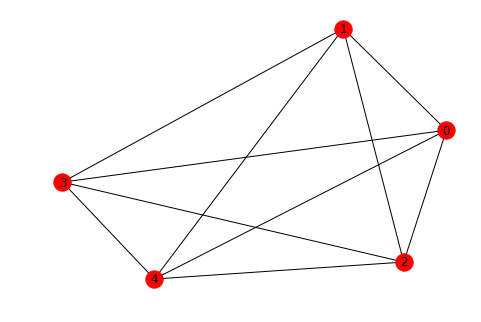

In [88]:
#10) Graph of Wn
GG =nx.Graph()
GG = nx.from_numpy_matrix(np.array(Wn))
nx.draw(GG, with_labels = True)

In [91]:
#11) Eigenvalues of Laplacian Matrix Ln associated to Wn
Dn = mD(Wn) #compute degree matrix Dn
Ln=Dn-Wn #compute laplacian matrix Ln
eigvaln,eigvecn=np.linalg.eig(Ln) #Eigenvalues and Eigenvectors of Ln
print(eigvaln)
eigvaln_sort=np.sort(eigvaln)
rn=sorted(zip(eigvaln, eigvecn))

[3.82 0.   0.65 2.82 1.84]


In [ ]:
#12
test = np.dot(L,rn[0][1])
test1=np.dot(L, rn[1][1])
test2 = np.dot(L,rn[2][1])
test3=np.dot(L, rn[3][1])
test4 = np.dot(L,rn[4][1])
print(test,test1,test2,test3,test4)

[0.   0.65 1.84 2.82 3.82]


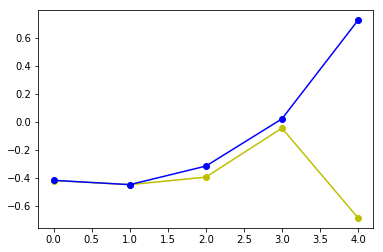

In [92]:
#13) Sort Eigenvalues in increasing order 

print(eigvaln_sort) 


#Plot the first and second Eigenvectors (associated with lowest and second lowest Eigenvalues)
plot.plot(rn[0][1],'yo-')
plot.plot(rn[1][1],'bo-')
#Explanation: the minimum value for the cut is given by the 2nd smallest eigenvalue of Ln
#The optimal bi-partition is given by the corresponding eigenvector

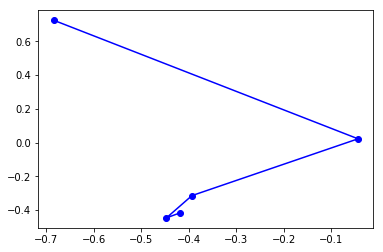

In [94]:
#14
plot.plot(rn[0][1],rn[1][1],'bo-')

[-0.42 -0.45 -0.31  0.02  0.73]
-0.08608544348363019


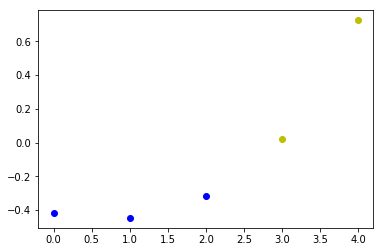

In [93]:
#15) Thresholding mechanism based on the mean value of the 2nd Eiganvector, 
#to associate a level with each sample (-1 1st cluster, +1 2nd cluster)

v2=rn[1][1]
mean=np.mean(v2)
cluster1 = []
cluster2 = []
tsh=mean
for i in range(len(v2)):
    if v2[i]<tsh:
        cluster1.append(i)
    else:
        cluster2.append(i)
print(v2)
print(mean)

#Plot the clusters
for i in cluster1:
    plot.plot(i,v2[i],'bo')
for i in cluster2:
    plot.plot(i,v2[i],'yo')

In [ ]:
#16 if it is 10, then the clustering changes, as mean on which we are threshlding is -0.086 is much less that 10.